process an image in notebook  

useful for testing of new code in `fringeprocess.py`

In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [3]:
image_folder = repo_folder / "tests" / "data" / "mock_square_gauges"
img_filename = image_folder / 'g1.bmp'

In [4]:
img = Image.open(img_filename)
img.convert("L")
img_array = np.asarray(img)
if img_array.ndim > 2:
    img_array = img_array.mean(axis=2)

In [5]:
xygb = np.array([[ 146., 180.],
       [931., 180.,],
       [931., 946.]])

In [6]:
ffrac, drawdata = fp.array2frac(img_array, xygb, drawinfo=True)

430


In [7]:
from plot_helpers import draw_gauge


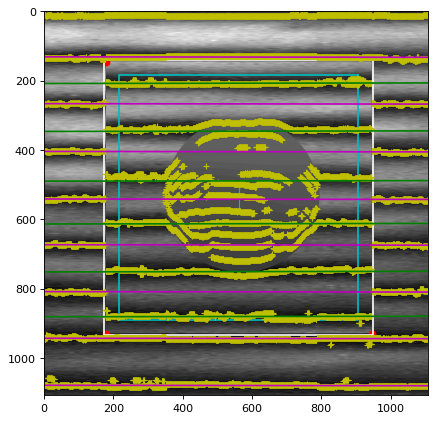

In [8]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
draw_gauge(axes, img_array, drawdata)

In [9]:
[
    xy,
    co,
    ro,
    ci,
    ri,
    ccen,
    rcen,
    pklist,
    slopep,
    interceptsp,
    slopeg,
    interceptsg,
] = drawdata

In [10]:
len(drawdata)

12

In [11]:
len(pklist)

1108

In [12]:
bwo, co, ro, bwi, ci, ri, ccen, rcen = fp.gbroif(img_array, xygb)

In [13]:
circle = (330, 290, 820, 780)
mask = Image.new(mode='1', size=img_array.shape)
draw = ImageDraw.Draw(mask)
draw.ellipse(circle, fill = 'white', outline ='white')

In [14]:
mask_array = np.asarray(mask)

In [15]:
pklist_masked = []
for col_num, col in enumerate(pklist):
    col_list = list(col)
    to_delete = []
    for peak in col_list:
        if mask_array[round(peak), col_num] == 1:
            to_delete.append(peak)
    col_array = np.array([item for item in col_list if item not in to_delete])
    pklist_masked.append(col_array)


    


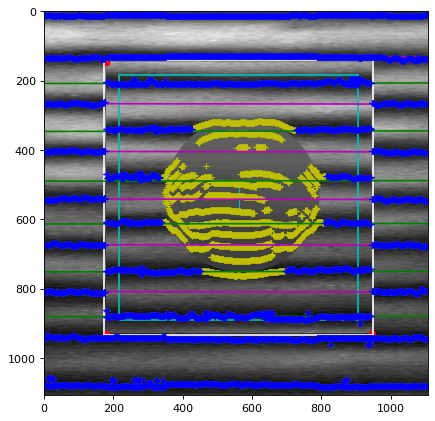

In [16]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
[
    xy,
    co,
    ro,
    ci,
    ri,
    ccen,
    rcen,
    pklist,
    slopep,
    interceptsp,
    slopeg,
    interceptsg,
] = drawdata

axes.imshow(img_array, cmap=matplotlib.cm.gray)
axes.axis("image")
axes.plot(xy[:, 1], xy[:, 0], "or")
axes.plot(ccen, rcen, "+c", ms=20)
axes.plot(co, ro, "w-")
axes.plot(ci, ri, "c-")
for col, peaks in enumerate(pklist):
    x = col * np.ones_like(peaks)
    axes.plot(x, peaks, "+y")
maxx = img_array.shape[1]
for cepts in interceptsp:
    axes.plot([0, maxx], [cepts, slopep * maxx + cepts], "-m")
for cepts in interceptsg:
    axes.plot([0, maxx], [cepts, slopeg * maxx + cepts], "g-")


for col, peaks in enumerate(pklist_masked):
    x = col * np.ones_like(peaks)
    axes.plot(x, peaks, "+b")

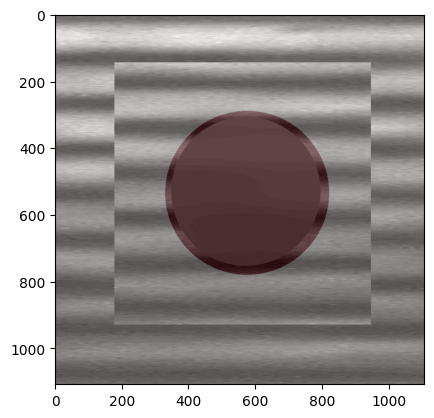

In [17]:

plt.imshow(img_array, cmap=matplotlib.cm.gray)
plt.imshow(mask_array, cmap=matplotlib.cm.Reds, alpha=0.3)

In [18]:
s = img_array
pklist = pklist_masked
y = s[:, 0]
bwp = np.ones_like(bwo) - bwo
slopep, interceptsp = fp.findfringes2(y, bwp, pklist)
frper = np.mean(np.diff((slopep * ccen + interceptsp)))
slopeg, interceptsg = fp.findfringes4e(s, frper, ci, ccen, bwi, pklist)
ffrac = fp.lines2frac(ccen, rcen, slopep, interceptsp, slopeg, interceptsg)

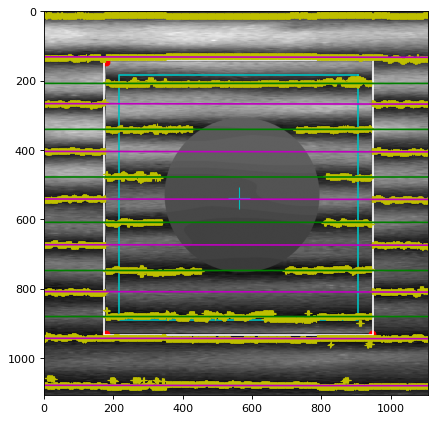

In [19]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.imshow(img_array, cmap=matplotlib.cm.gray)
axes.axis("image")
axes.plot(xy[:, 1], xy[:, 0], "or")
axes.plot(ccen, rcen, "+c", ms=20)
axes.plot(co, ro, "w-")
axes.plot(ci, ri, "c-")
for col, peaks in enumerate(pklist):
    x = col * np.ones_like(peaks)
    axes.plot(x, peaks, "+y")
maxx = img_array.shape[1]
for cepts in interceptsp:
    axes.plot([0, maxx], [cepts, slopep * maxx + cepts], "-m")
for cepts in interceptsg:
    axes.plot([0, maxx], [cepts, slopeg * maxx + cepts], "g-")




In [24]:
(circle[0] + ci[3])/2.

np.float64(273.65000000000003)

In [23]:
ci

array([906.7, 906.7, 217.3, 217.3, 906.7])